# Twitter bot Detection



In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [2]:
#To check Performances
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [3]:
def Performance(actual_value , predicted_value):
    accuracy = accuracy_score(actual_value , predicted_value) * 100
    precision = precision_score(actual_value , predicted_value) * 100
    recall = recall_score(actual_value , predicted_value) * 100
    f1 = f1_score(actual_value , predicted_value, average='weighted')
    print('Accuracy is {:.4f}%\n Precision is {:.4f}%\n Recall is {:.4f}%\nF1 Score is {:.4f}\n'.format(accuracy, precision, recall, f1))

In [4]:
# Set Data
training_data = pd.read_csv("training_data_2_csv_UTF.csv")
bots = training_data[training_data.bot==1]
Nbots = training_data[training_data.bot==0]

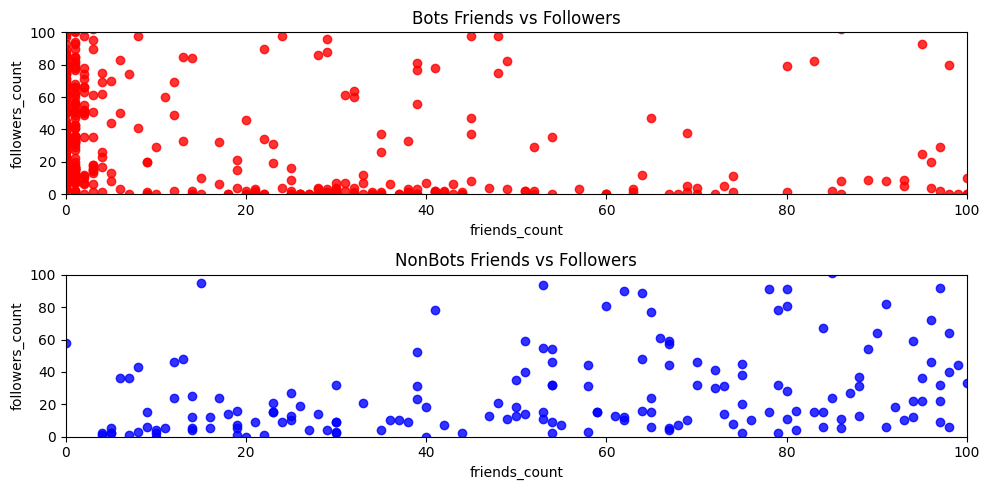

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(2,1,1)
plt.title('Bots Friends vs Followers')
sns.regplot(x=bots.friends_count, y=bots.followers_count, color='red', label='Bots')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.tight_layout()

plt.subplot(2,1,2)
plt.title('NonBots Friends vs Followers')
sns.regplot(x=Nbots.friends_count, y=Nbots.followers_count, color='blue', label='NonBots')
plt.xlim(0, 100)
plt.ylim(0, 100)

plt.tight_layout()
plt.show()

In [6]:
training_data.columns

Index(['id', 'id_str', 'screen_name', 'location', 'description', 'url',
       'followers_count', 'friends_count', 'listed_count', 'created_at',
       'favourites_count', 'verified', 'statuses_count', 'lang', 'status',
       'default_profile', 'default_profile_image', 'has_extended_profile',
       'name', 'bot'],
      dtype='object')

In [7]:
training_data.head(10)

,id,id_str,screen_name,location,description,url,followers_count,friends_count,listed_count,created_at,favourites_count,verified,statuses_count,lang,status,default_profile,default_profile_image,has_extended_profile,name,bot
0,8.160000e+17,"""815745789754417152""","""HoustonPokeMap""","""Houston, TX""","""Rare and strong PokŽmon in Houston, TX. See m...","""https://t.co/dnWuDbFRkt""",1291,0,10,"""Mon Jan 02 02:25:26 +0000 2017""",0,False,78554,"""en""","{\r ""created_at"": ""Sun Mar 12 15:44:04 +0...",True,False,False,"""Houston PokŽ Alert""",1
1,4.843621e+09,4843621225,kernyeahx,"Templeville town, MD, USA",From late 2014 Socium Marketplace will make sh...,NaN,1,349,0,2/1/2016 7:37,38,False,31,en,NaN,True,False,False,Keri Nelson,1
2,4.303727e+09,4303727112,mattlieberisbot,NaN,"Inspired by the smart, funny folks at @replyal...",https://t.co/P1e1o0m4KC,1086,0,14,Fri Nov 20 18:53:22 +0000 2015,0,False,713,en,"{'retweeted': False, 'is_quote_status': False,...",True,False,False,Matt Lieber Is Bot,1
3,3.063139e+09,3063139353,sc_papers,NaN,NaN,NaN,33,0,8,2/25/2015 20:11,0,False,676,en,Construction of human anti-tetanus single-chai...,True,True,False,single cell papers,1
4,2.955142e+09,2955142070,lucarivera16,"Dublin, United States",Inspiring cooks everywhere since 1956.,NaN,11,745,0,1/1/2015 17:44,146,False,185,en,NaN,False,False,False,lucarivera16,1
5,8.410000e+17,8.41E+17,dantheimprover,"Austin, TX",Just a guy trying to do good by telling everyo...,NaN,1,186,0,13/03/2017 22:53,0,False,11,en,Status(_api=<tweepy.api.API object at 0x101927...,True,False,True,dantheimprover,1
6,2.482835e+09,2482834658,_all_of_us_,in a machine.,bot by @rubicon,NaN,193,0,19,Wed May 07 22:29:25 +0000 2014,0,False,6068,en,"{u'contributors': None, u'truncated': False, u...",False,False,False,everything always,1
7,3.333574e+09,3333573622,KatamariItems,NaN,[Bot rolled up by @BeachEpisode] Cataloguing e...,NaN,8227,2,89,Thu Jun 18 22:07:31 +0000 2015,26,False,2597,en,"{u'contributors': None, u'truncated': False, u...",True,False,False,Katamari Collection,1
8,2.996105e+09,2996105102,AutophagyPapers,NaN,Twitterbot for #Autophagy papers. Curated by @...,NaN,275,0,17,1/25/2015 17:34,23,False,9922,en,Feeding Schedule And Proteolysis Regulate Auto...,False,False,False,Autophagy Papers,1
9,3.271096e+09,3271095818,HSC_papers,NaN,NaN,NaN,51,3,9,7/7/2015 15:23,0,False,2515,en,Functional Selectivity in Cytokine Signaling R...,True,False,False,Hematopoiesis,1


In [8]:
training_data.describe()

,id,followers_count,friends_count,listed_count,favourites_count,statuses_count,bot
count,2.797000e+03,2.797000e+03,2.797000e+03,2797.000000,2797.000000,2.797000e+03,2797.000000
mean,1.482460e+17,9.964245e+05,4.796493e+03,3192.299964,2035.577047,1.945170e+04,0.472292
std,3.100578e+17,5.593714e+06,5.619217e+04,17283.423291,16073.463967,1.543729e+05,0.499321
min,3.526000e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000
25%,6.895649e+07,4.400000e+01,1.100000e+01,1.000000,0.000000,1.660000e+02,0.000000
50%,1.917035e+09,3.430000e+02,1.840000e+02,17.000000,25.000000,2.240000e+03,0.000000
75%,3.326332e+09,1.372500e+04,6.690000e+02,332.000000,491.000000,1.004200e+04,1.000000
max,8.410000e+17,9.632156e+07,2.056668e+06,620331.000000,714021.000000,6.863363e+06,1.000000


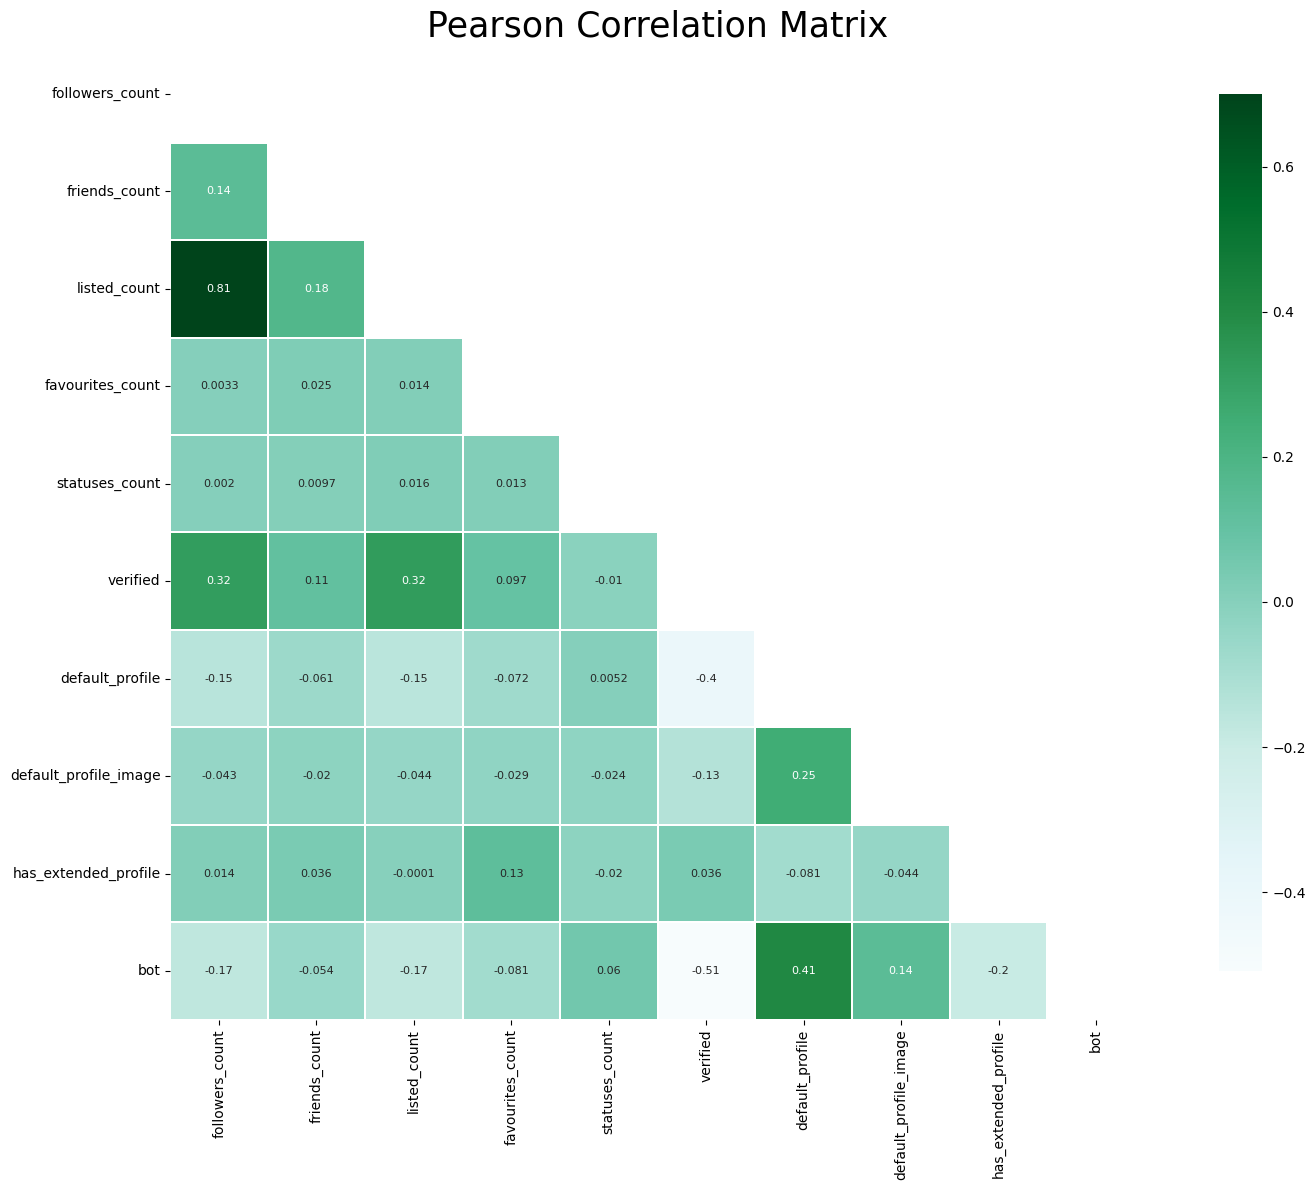

In [9]:
# Select only numeric columns for correlation
numeric_features = [
    'followers_count', 
    'friends_count', 
    'listed_count', 
    'favourites_count', 
    'statuses_count', 
    'verified',  # if it's binary (0/1)
    'default_profile', 
    'default_profile_image', 
    'has_extended_profile', 
    'bot'  # if it's binary (0/1)
]

# Create mask for the upper triangle
mask = np.zeros_like(training_data[numeric_features].corr(), dtype=bool)
mask[np.triu_indices_from(mask)] = True 

# Plot the heatmap
f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix', fontsize=25)

sns.heatmap(
    training_data[numeric_features].corr(),
    linewidths=0.25,
    vmax=0.7,
    square=True,
    cmap="BuGn", 
    linecolor='w',
    annot=True,
    annot_kws={"size": 8},
    mask=mask,
    cbar_kws={"shrink": 0.9}
)

plt.tight_layout()
plt.show()

In [10]:
training_data.drop(['id_str', 'screen_name', 'location', 'description', 'url', 'created_at', 'lang', 'status', 'has_extended_profile','name'],axis=1,inplace=True)

In [11]:
training_data.head()

,id,followers_count,friends_count,listed_count,favourites_count,verified,statuses_count,default_profile,default_profile_image,bot
0,8.160000e+17,1291,0,10,0,False,78554,True,False,1
1,4.843621e+09,1,349,0,38,False,31,True,False,1
2,4.303727e+09,1086,0,14,0,False,713,True,False,1
3,3.063139e+09,33,0,8,0,False,676,True,True,1
4,2.955142e+09,11,745,0,146,False,185,False,False,1


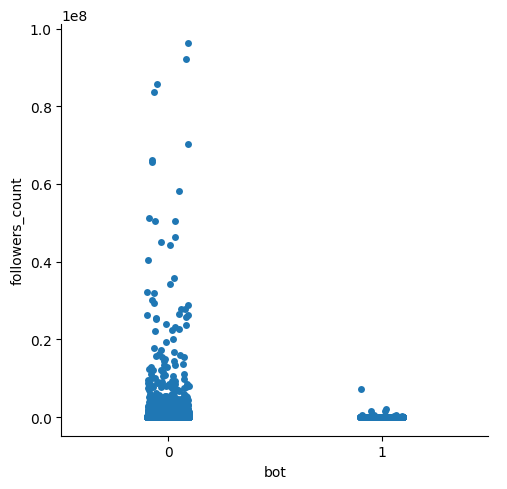

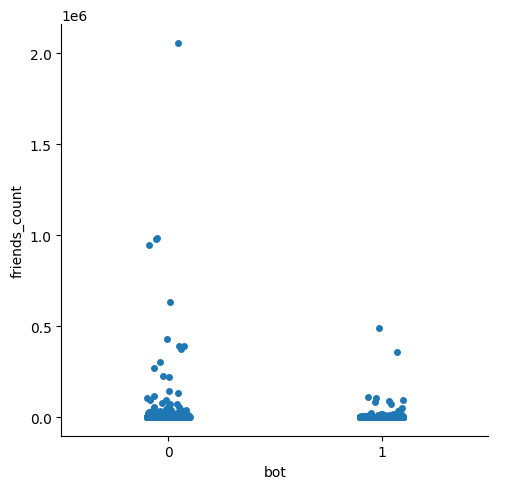

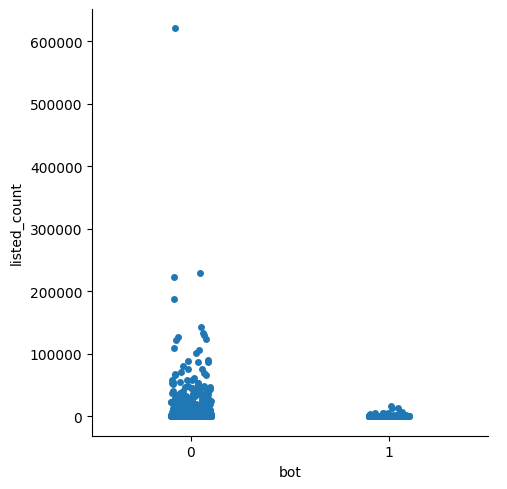

In [17]:
sns.catplot(x="bot", y="followers_count", data=training_data);
sns.catplot(x="bot", y="friends_count", data=training_data);
sns.catplot(x="bot", y="listed_count", data=training_data);

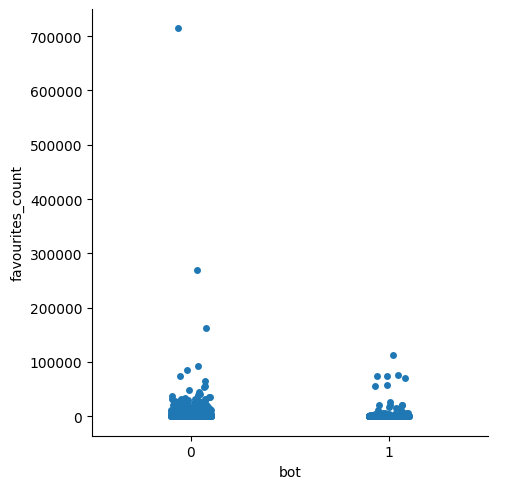

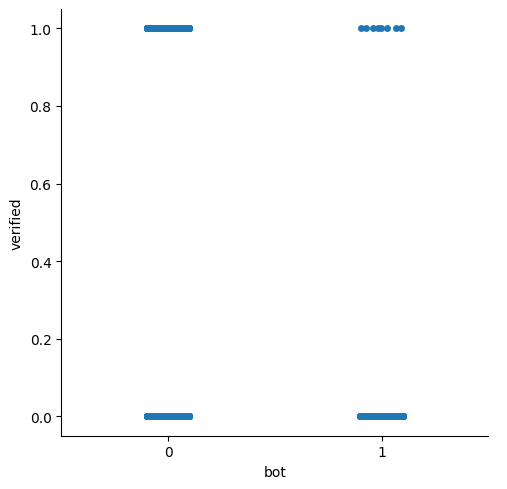

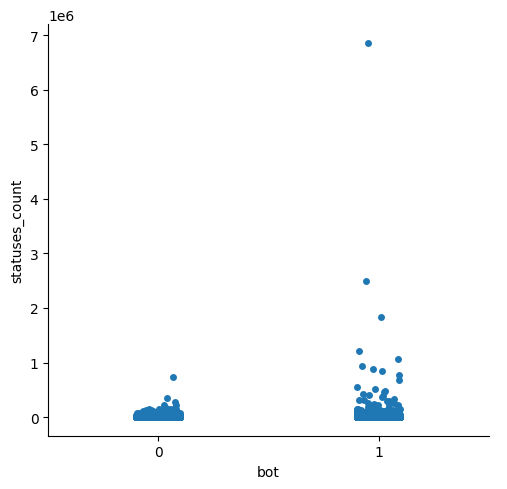

In [18]:
sns.catplot(x="bot", y="favourites_count", data=training_data);
sns.catplot(x="bot", y="verified", data=training_data);
sns.catplot(x="bot", y="statuses_count", data=training_data);

In [12]:
X = training_data.iloc[:, :-1].values
y = training_data.iloc[:, 9].values

In [13]:
from sklearn.preprocessing import LabelEncoder
Labelx=LabelEncoder()
X[:,5]=Labelx.fit_transform(X[:,5])
X[:,7]=Labelx.fit_transform(X[:,7])
X[:,8]=Labelx.fit_transform(X[:,8])

# KNN

In [14]:
from sklearn.neighbors import KNeighborsClassifier as knn
classifier=knn(n_neighbors=5)
classifier.fit(X,y)
bots = training_data[training_data.bot==1]
Nbots = training_data[training_data.bot==0]
 
B = bots.iloc[:,:-1]
B_y = bots.iloc[:,9]
B_pred = classifier.predict(B)

#Confusionmatrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(B_y,B_pred)
Performance(B_y,B_pred)

NB = Nbots.iloc[:,:-1]
NB_y = Nbots.iloc[:,9]
NB_pred = classifier.predict(NB)

#Confusionmatrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(NB_y,NB_pred)
Performance(NB_y,NB_pred)

Accuracy is 89.1749%
 Precision is 100.0000%
 Recall is 89.1749%
F1 Score is 0.9428

Accuracy is 84.7561%
 Precision is 0.0000%
 Recall is 0.0000%
F1 Score is 0.9175



# SVM

In [15]:
from sklearn.svm import SVC
classifier=SVC(kernel='rbf', random_state=0)
classifier.fit(X,y)
bots = training_data[training_data.bot==1]
Nbots = training_data[training_data.bot==0]
 
B = bots.iloc[:,:-1]
B_y = bots.iloc[:,9]
B_pred = classifier.predict(B)

#Confusionmatrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(B_y,B_pred)
Performance(B_y,B_pred)

NB = Nbots.iloc[:,:-1]
NB_y = Nbots.iloc[:,9]
NB_pred = classifier.predict(NB)

#Confusionmatrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(NB_y,NB_pred)
Performance(NB_y,NB_pred)


Accuracy is 31.7941%
 Precision is 100.0000%
 Recall is 31.7941%
F1 Score is 0.4825

Accuracy is 93.0894%
 Precision is 0.0000%
 Recall is 0.0000%
F1 Score is 0.9642



# Naive Bayes

In [16]:
from sklearn.naive_bayes import GaussianNB as GNB
classifier=GNB()
classifier.fit(X,y)
bots = training_data[training_data.bot==1]
Nbots = training_data[training_data.bot==0]
 
B = bots.iloc[:,:-1]
B_y = bots.iloc[:,9]
B_pred = classifier.predict(B)

#Confusionmatrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(B_y,B_pred)
Performance(B_y,B_pred)

NB = Nbots.iloc[:,:-1]
NB_y = Nbots.iloc[:,9]
NB_pred = classifier.predict(NB)

#Confusionmatrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(NB_y,NB_pred)
Performance(NB_y,NB_pred)

Accuracy is 31.7941%
 Precision is 100.0000%
 Recall is 31.7941%
F1 Score is 0.4825

Accuracy is 93.0894%
 Precision is 0.0000%
 Recall is 0.0000%
F1 Score is 0.9642



# Random Forest

In [17]:
#fitting
from sklearn.ensemble import RandomForestClassifier as rf
classifier= rf(n_estimators=10,criterion='entropy',random_state=0)
classifier.fit(X,y)
bots = training_data[training_data.bot==1]
Nbots = training_data[training_data.bot==0]

B = bots.iloc[:,:-1]
B_y = bots.iloc[:,9]
B_pred = classifier.predict(B)

#Confusionmatrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(B_y,B_pred)
Performance(B_y,B_pred)

NB = Nbots.iloc[:,:-1]
NB_y = Nbots.iloc[:,9]
NB_pred = classifier.predict(NB)
 
#Confusionmatrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(NB_y,NB_pred)
Performance(NB_y,NB_pred)

Accuracy is 99.1673%
 Precision is 100.0000%
 Recall is 99.1673%
F1 Score is 0.9958

Accuracy is 99.5935%
 Precision is 0.0000%
 Recall is 0.0000%
F1 Score is 0.9980



# Decision Tree Classifier

In [18]:
from sklearn.tree import DecisionTreeClassifier as DTC
classifier= DTC(criterion="entropy")
classifier.fit(X,y)
bots = training_data[training_data.bot==1]
Nbots = training_data[training_data.bot==0]
 
B = bots.iloc[:,:-1]
B_y = bots.iloc[:,9]
B_pred = classifier.predict(B)

#Confusionmatrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(B_y,B_pred)
Performance(B_y,B_pred)

NB = Nbots.iloc[:,:-1]
NB_y = Nbots.iloc[:,9]
NB_pred = classifier.predict(NB)

#Confusionmatrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(NB_y,NB_pred)
Performance(NB_y,NB_pred)


Accuracy is 99.8486%
 Precision is 100.0000%
 Recall is 99.8486%
F1 Score is 0.9992

Accuracy is 100.0000%
 Precision is 0.0000%
 Recall is 0.0000%
F1 Score is 1.0000



# On comparing Accuracy, Best Method is Decision Tree Classifier

# Working on test data

In [19]:
from sklearn.tree import DecisionTreeClassifier as DTC
classifier= DTC(criterion="entropy")
classifier.fit(X,y)
test_data = pd.read_csv("test_data_4_students.csv");
test_data.drop(['id_str', 'screen_name', 'location', 'description', 'url', 'created_at', 'lang', 'status', 'has_extended_profile','name'],axis=1,inplace=True)


X1 = training_data.iloc[:, :-1].values

from sklearn.preprocessing import LabelEncoder
Labelx=LabelEncoder()
X1[:,6]=Labelx.fit_transform(X1[:,6])
X1[:,7]=Labelx.fit_transform(X1[:,7])
X1[:,8]=Labelx.fit_transform(X1[:,8])
y1_pred = classifier.predict(X1)
y1_pred=pd.DataFrame(y1_pred);
y1_pred.to_csv("Result.csv",index=False);

In [20]:
print(y1_pred)

      0
0     1
1     1
2     1
3     1
4     1
...  ..
2792  0
2793  0
2794  0
2795  0
2796  0

[2797 rows x 1 columns]


# Custom Classification Model


In [23]:
class twitter_bot(object):
    def __init__(self):
        pass

    def perform_train_test_split(df):
        msk = np.random.rand(len(df)) < 0.75
        train, test = df[msk], df[~msk]
        X_train, y_train = train, train.iloc[:,-1]
        X_test, y_test = test, test.iloc[:, -1]
        return (X_train, y_train, X_test, y_test)

    def bot_prediction_algorithm(df):
        train_df = df.copy()
        # converting id to int
        train_df['id'] = train_df.id.apply(lambda x: int(x))
        bag_of_words_bot = r'BOT|Bot|bot|b0t|cannabis|tweet me|mishear|follow me|updates every|gorilla|yes_ofc|forget' \
                           r'expos|kill|clit|bbb|butt|fuck|XXX|sex|truthe|fake|anony|free|virus|funky|RNA|kuck|jargon' \
                           r'nerd|swag|jack|bang|bonsai|chick|prison|paper|pokem|xx|freak|ffd|dunia|clone|genie|bbb' \
                           r'ffd|onlyman|emoji|joke|troll|droop|free|every|wow|cheese|yeah|bio|magic|wizard|face'


        # converting verified into vectors
        train_df['verified'] = train_df.verified.apply(lambda x: 1 if ((x == True) or x == 'TRUE') else 0)
        # check if the name contains bot or screenname contains b0t
        condition = ((train_df.name.str.contains(bag_of_words_bot, case=False, na=False)) |
                     (train_df.description.str.contains(bag_of_words_bot, case=False, na=False)) |
                     (train_df.screen_name.str.contains(bag_of_words_bot, case=False, na=False)) |
                     (train_df.status.str.contains(bag_of_words_bot, case=False, na=False))
                     )  # these all are bots
        predicted_df = train_df[condition]  # these all are bots
        predicted_df.bot = 1
        predicted_df = predicted_df[['id', 'bot']]

        # check if the user is verified
        verified_df = train_df[~condition]
        condition = (verified_df.verified == 1)  # these all are nonbots
        predicted_df1 = verified_df[condition][['id', 'bot']]
        predicted_df1.bot = 0
        predicted_df = pd.concat([predicted_df, predicted_df1])

        # check if description contains buzzfeed
        buzzfeed_df = verified_df[~condition]
        condition = (buzzfeed_df.description.str.contains("buzzfeed", case=False, na=False))  # these all are nonbots
        predicted_df1 = buzzfeed_df[buzzfeed_df.description.str.contains("buzzfeed", case=False, na=False)][['id', 'bot']]
        predicted_df1.bot = 0
        predicted_df = pd.concat([predicted_df, predicted_df1])

        # check if listed_count>16000
        listed_count_df = buzzfeed_df[~condition]
        listed_count_df.listed_count = listed_count_df.listed_count.apply(lambda x: 0 if x == 'None' else x)
        listed_count_df.listed_count = listed_count_df.listed_count.apply(lambda x: int(x))
        condition = (listed_count_df.listed_count > 16000)  # these all are nonbots
        predicted_df1 = listed_count_df[condition][['id', 'bot']]
        predicted_df1.bot = 0
        predicted_df = pd.concat([predicted_df, predicted_df1])
        #remaining
        predicted_df1 = listed_count_df[~condition][['id', 'bot']]
        predicted_df1.bot = 0 # these all are nonbots
        predicted_df = pd.concat([predicted_df, predicted_df1])
        return predicted_df

    def get_predicted_and_true_values(features, target):
        y_pred, y_true = twitter_bot.bot_prediction_algorithm(features).bot.tolist(), target.tolist()
        return (y_pred, y_true)

    def get_accuracy_score(df):
        (X_train, y_train, X_test, y_test) = twitter_bot.perform_train_test_split(df)
        # predictions on training data
        y_pred_train, y_true_train = twitter_bot.get_predicted_and_true_values(X_train, y_train)
        Performance(y_pred_train, y_true_train)

if __name__ == '__main__':
    train_ = pd.read_csv('training_data_2_csv_UTF.csv')
    test_ = pd.read_csv('test_data_4_students.csv')
    

    train_.drop(['id_str', 'location', 'url', 'created_at', 'lang', 'has_extended_profile'],axis=1,inplace=True)
    test_.drop(['id_str', 'location', 'url', 'created_at', 'lang', 'has_extended_profile'],axis=1,inplace=True)  
    predicted_df = twitter_bot.bot_prediction_algorithm(test_)   
    twitter_bot.get_accuracy_score(train_)

Accuracy is 97.1865%
 Precision is 94.0344%
 Recall is 100.0000%
F1 Score is 0.9719



In [24]:
BKNN=[]
BSVM=[]
BNB=[]
BRF=[]
BDT=[]
MA=[]
NBKNN=[]
NBSVM=[]
NBNB=[]
NBRF=[]
NBDT=[]
BKNN.append(88.4179)
BKNN.append(85.3659)
BSVM.append(31.7941)
BSVM.append(93.0894)
BNB.append(31.7941)
BNB.append(93.0894)
BRF.append(99.1673)
BRF.append(99.5935)
BDT.append(99.8486)
BDT.append(100.00)
MA.append(95.3802)
MA.append(95.3802)

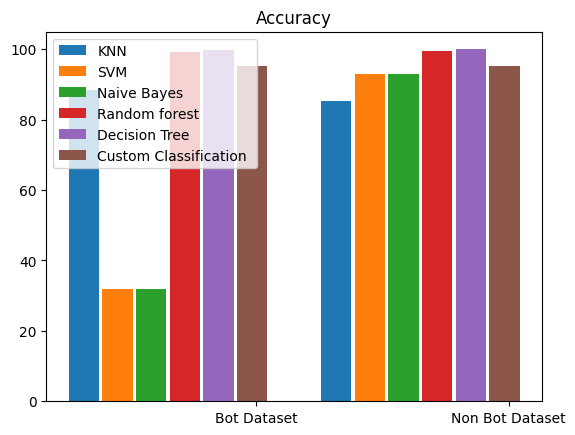

In [26]:
bar_width = 0.35
opacity = 0.9
index = np.arange(2)
from matplotlib import pyplot as plt

def bar_plot(ax, data, colors=None, total_width=0.8, single_width=1, legend=True):
        # Check if colors where provided, otherwhise use the default color cycle
    if colors is None:
        colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

    # Number of bars per group
    n_bars = len(data)

    # The width of a single bar
    bar_width = total_width / n_bars

    # List containing handles for the drawn bars, used for the legend
    bars = []

    # Iterate over all data
    for i, (name, values) in enumerate(data.items()):
        # The offset in x direction of that bar
        x_offset = (i - n_bars / 2) * bar_width + bar_width / 2

        # Draw a bar for every value of that type
        for x, y in enumerate(values):
            bar = ax.bar(x + x_offset, y, width=bar_width * single_width, color=colors[i % len(colors)])

        # Add a handle to the last drawn bar, which we'll need for the legend
        bars.append(bar[0])

    # Draw legend if we need
    if legend:
        ax.legend(bars, data.keys())


if __name__ == "__main__":
    # Usage example:
    data = {
        "KNN": BKNN,
        "SVM": BSVM,
        "Naive Bayes": BNB,
        "Random forest": BRF,
        "Decision Tree": BDT,
        "Custom Classification ":MA
    }

    fig, ax = plt.subplots()
    bar_plot(ax, data, total_width=.8, single_width=.9)
    plt.xticks(index + bar_width , ('Bot Dataset','Non Bot Dataset'))
    plt.title("Accuracy")
    plt.show()